# Markov_Decision_Process (MDP):

## Case Study: Applying Markov Decision Processes (MDP) to Chess
Introduction

Chess is a complex strategic game with a vast number of possible positions and moves. To model the decision-making process in chess, we can use a Markov Decision Process (MDP). An MDP is a mathematical framework used to describe an environment in decision-making problems where outcomes are partly random and partly under the control of a decision-maker. This case study explores how an MDP can be applied to chess to optimize move selection and strategy.
Components of MDP in Chess

    States (S):
        Each state represents a unique configuration of the chessboard. Given the immense complexity of chess, states can be encoded in various ways, such as using piece-square tables or bitboards.

    Actions (A):
        Actions are the legal moves available from a given state. For instance, moving a piece from one square to another.

    Transition Model (T):
        The transition model T(s,a,s′)T(s,a,s′) represents the probability of moving from state ss to state s′s′ after taking action aa. In deterministic games like chess, this probability is typically 1 for legal moves and 0 otherwise.

    Rewards (R):
        The reward function R(s,a,s′)R(s,a,s′) assigns a numerical value to the transition from state ss to state s′s′ via action aa. Rewards can be defined based on various factors such as material advantage, positional advantage, or game outcomes (win, loss, draw).

    Policy (π):
        A policy is a strategy that specifies the action to take in each state. The goal is to find an optimal policy π∗π∗ that maximizes the expected cumulative reward over time.

Applying MDP to Chess

    Defining States:
        States in chess can be defined using FEN (Forsyth-Edwards Notation) strings, which encode the positions of all pieces, castling rights, en passant targets, and move counters. For computational purposes, more efficient representations like bitboards can be used.

    Legal Moves and Transition Model:
        A function to generate all legal moves for a given state is implemented. For each legal move, the resulting state is determined, forming the basis for the transition model.

    Reward Function:
        Simple rewards can be assigned based on material count (e.g., +1 for a pawn, +3 for a knight or bishop, +5 for a rook, +9 for a queen).
        More sophisticated rewards can include positional factors evaluated by a chess engine.

    Policy and Value Iteration:
        The policy iteration or value iteration algorithm can be used to compute the optimal policy. These algorithms iteratively update the value of each state and the policy to maximize the expected reward.

In [2]:
import numpy as np

class ChessMDP:
    def __init__(self, states, actions, rewards, transition_model):
        self.states = states
        self.actions = actions
        self.rewards = rewards
        self.transition_model = transition_model
        self.values = {s: 0 for s in states}
        self.policy = {s: np.random.choice(actions[s]) for s in states}
    
    def value_iteration(self, gamma=0.9, theta=1e-6):
        while True:
            delta = 0
            for s in self.states:
                v = self.values[s]
                max_value = float('-inf')
                best_action = None
                for a in self.actions[s]:
                    value = sum([
                        self.transition_model.get(s, {}).get(a, {}).get(s_prime, 0) *
                        (self.rewards.get(s, {}).get(a, {}).get(s_prime, 0) + gamma * self.values[s_prime])
                        for s_prime in self.states
                    ])
                    if value > max_value:
                        max_value = value
                        best_action = a
                self.values[s] = max_value
                self.policy[s] = best_action
                delta = max(delta, abs(v - self.values[s]))
            if delta < theta:
                break

# Example usage:
states = ['start', 'midgame', 'endgame']
actions = {
    'start': ['move1', 'move2'],
    'midgame': ['move3', 'move4'],
    'endgame': ['move5', 'move6']
}
rewards = {
    'start': {'move1': {'midgame': 1}, 'move2': {'midgame': 0}},
    'midgame': {'move3': {'endgame': 1}, 'move4': {'endgame': 0}},
    'endgame': {'move5': {'endgame': 1}, 'move6': {'endgame': -1}}
}
transition_model = {
    'start': {'move1': {'midgame': 1.0}, 'move2': {'midgame': 1.0}},
    'midgame': {'move3': {'endgame': 1.0}, 'move4': {'endgame': 1.0}},
    'endgame': {'move5': {'endgame': 1.0}, 'move6': {'endgame': 1.0}}
}

mdp = ChessMDP(states, actions, rewards, transition_model)
mdp.value_iteration()

print("Optimal Values:", mdp.values)
print("Optimal Policy:", mdp.policy)

Optimal Values: {'start': 9.999991791689899, 'midgame': 9.999991791689899, 'endgame': 9.999991791689899}
Optimal Policy: {'start': 'move1', 'midgame': 'move3', 'endgame': 'move5'}


# Theory related to Markov_decision_Process:

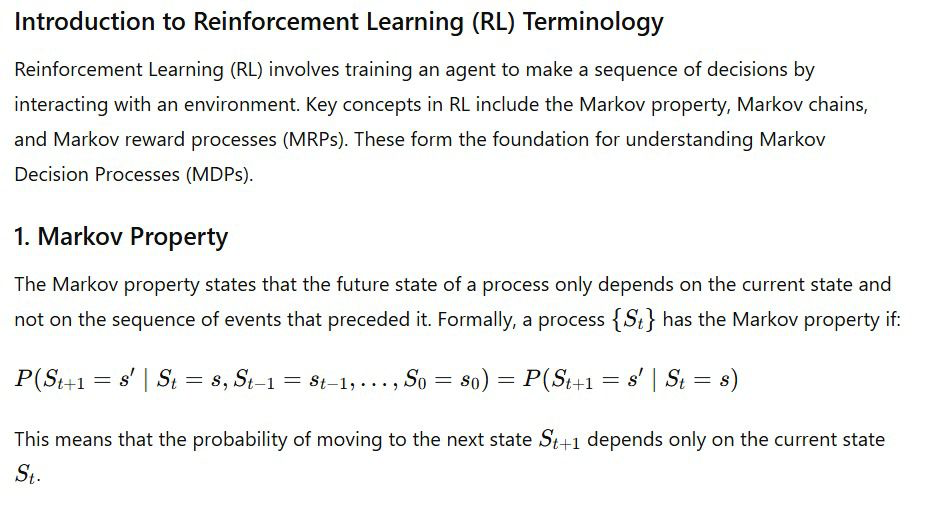

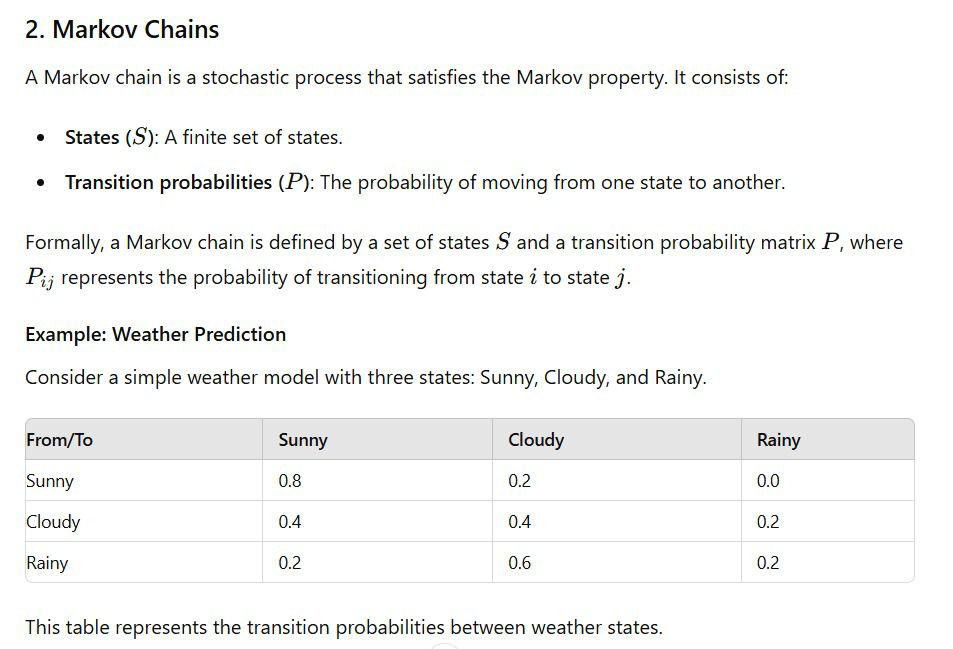

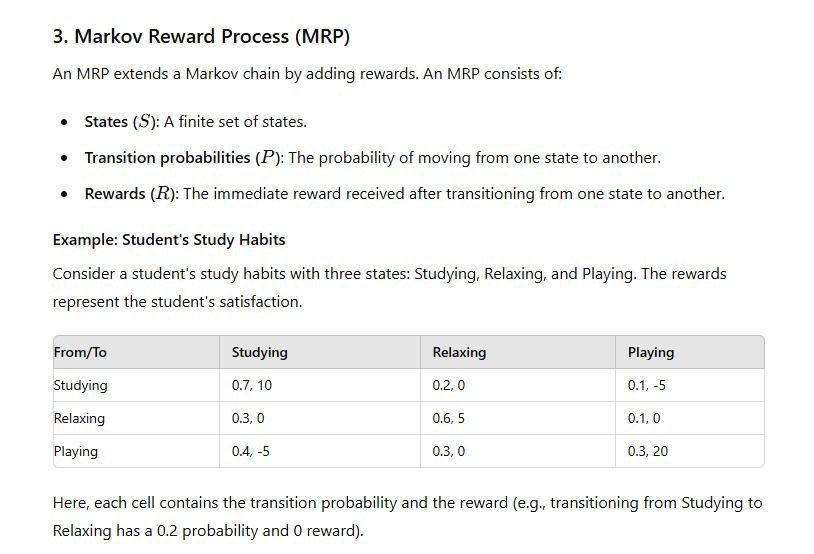

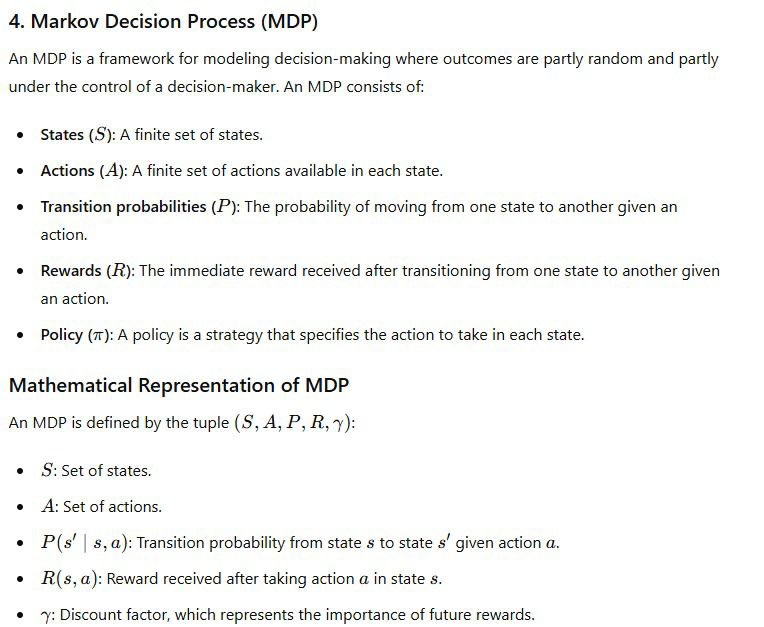

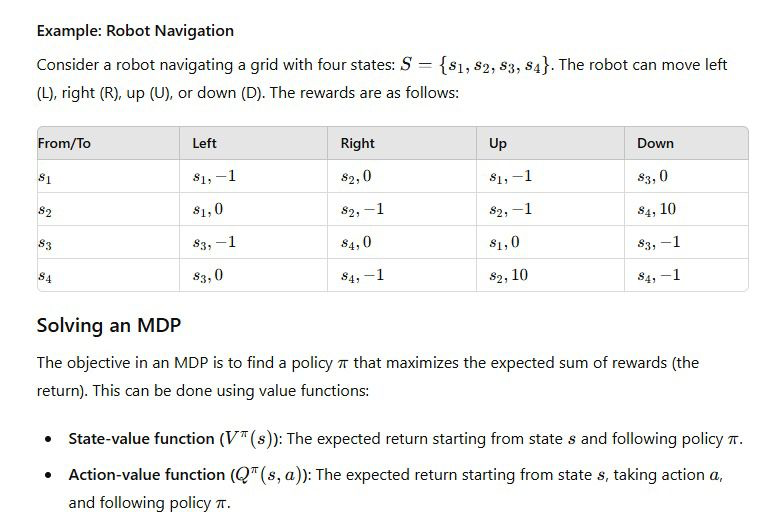

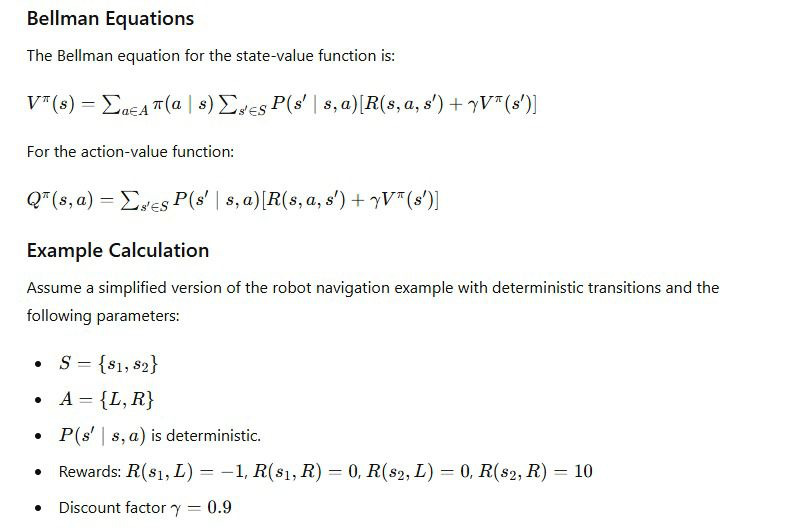
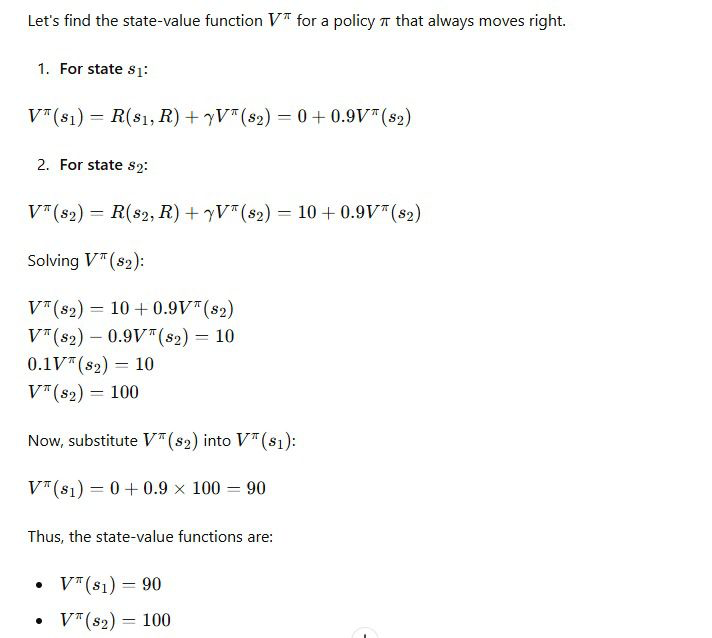